# Machine Learning Project
### Fall 2023
## Predicting Hotel Reservation Cancellations



## Introduction


I have worked with the `bookings_df` data frame in this project. This data set contains information on over 5,000 reservations made at a U.S. hotel. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their hotel reservations and develop machine learning algorithms that will predict the likelihood of a customer canceling their reservation in the future.

## Hotel Bookings Data

The `bookings_df` data frame contains information about bookings (reservations) for a U.S. based hotel.

The hotel's goal is to become better at identifying customers at risk of canceling their reservation.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers cancelling their reservation?
- Is it possible to predict whether a customer will cancel their reservation? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the hotel can implement to reduce the risk of losing their reservations?

<br>

The data set contains last years hotel bookings (reservations) along with customer and room attributes.

The outcome variable in this data is `booking_status`. This variable records whether a customer eventually cancelled their reservation and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'canceled' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	         | Definition                                 	                                    | Data Type |
|:-------------------------------|:---------------------------------------------------------------------------------|:----------|
| booking_status                 | Reservation outcome (canceled or not_canceled)                                   | Factor    |
| booking_type                   | How the reservation was booked (online, moblie app,...)                          | Factor    |
| previous_cancellations         | Number of previous cancellations for this customer, if any                       | Numeric   |
| previous_non_canceled_bookings | Number of previous bookings that were not canceled                               | Numeric   |
| adults                         | Number of adults for this booking (reservation)                                  | Numeric   |
| children                       | Number of children for this booking (reservation)                                | Numeric   |
| weekend_nights                 | Number of weekend nights (Sat/Sun) for this booking (reservation)                | Numeric   |
| week_nights                    | Number of week nights (Mon - Fri) for this booking (reservation)                 | Numeric   |
| room_price                     | Room price (U.S. Dollars)                                                        | Numeric   |
| special_requests               | Number of special requests made by customer for this reservation                 | Numeric   |
| meal_plan                      | Meal plan selected by customer for this reservation                              | Factor    |
| reserved_parking_space         | Did the customer select a reserved parking space (0/1)                           | Numeric   |
| room_type                      | Room type selected by customer                                                   | Factor    |
| lead_time_days                 | Number of days in advance that the reservation was booked                        | Numeric   |
| arrival_occupancy_season       | In which period of the year will the customer arrive? (low, moderate, peak)      | Numeric   |

In [7]:
# Load data
library(tidyverse)

bookings_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/bookings.rds'))

In [8]:
# View data
bookings_df

booking_status,booking_type,previous_cancellations,previous_non_canceled_bookings,adults,children,weekend_nights,week_nights,room_price,special_requests,meal_plan,reserved_parking_space,room_type,lead_time_days,arrival_occupancy_season
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>
not_canceled,online,0,0,2,0,0,2,87.78,2,american,1,suite,12,peak
canceled,online,0,0,2,0,1,1,126.90,0,continental,0,suite,89,moderate
canceled,online,0,0,2,0,0,1,85.50,0,american,0,suite,139,peak
canceled,online,0,0,2,1,1,1,164.25,1,modified_american,0,suite,188,peak
canceled,online,0,0,2,0,1,2,75.00,0,continental,0,suite,418,moderate
not_canceled,mobile_app,0,0,2,0,0,1,120.00,0,continental,0,suite,56,peak
not_canceled,travel_agency,0,0,2,0,0,2,128.00,1,american,1,suite,1,moderate
not_canceled,online,0,0,1,0,0,1,152.00,2,continental,0,suite,14,low
not_canceled,online,0,1,2,0,1,1,93.60,1,continental,1,suite,64,low


# Exploratory Data Analysis



## Question 1


**Question**:

Is there a relationship between room type and booking cancellations?

**Answer**:
The various categories of rooms have varying cancellation policies. At 50.9%, executive suites have the greatest cancellation rate of any type of room; studios have the lowest cancellation rate, at 33.8%. This implies that, in comparison to other room categories, consumers who reserve Executive Suites are more likely to cancel their reservations. The possibility of a booking cancellation may vary depending on the kind of accommodation selected; Executive Suites have a noticeably higher cancellation rate.

## Supporting Analysis

In [9]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

`summarise()` has grouped output by 'room_type'. You can override using the
`.groups` argument.


room_type,booking_status,count,cancellation_rate
<fct>,<fct>,<int>,<dbl>
studio,canceled,267,0.3379747
suite,canceled,1573,0.3361829
presidential_suite,canceled,30,0.3370787
executive_suite,canceled,85,0.5089820


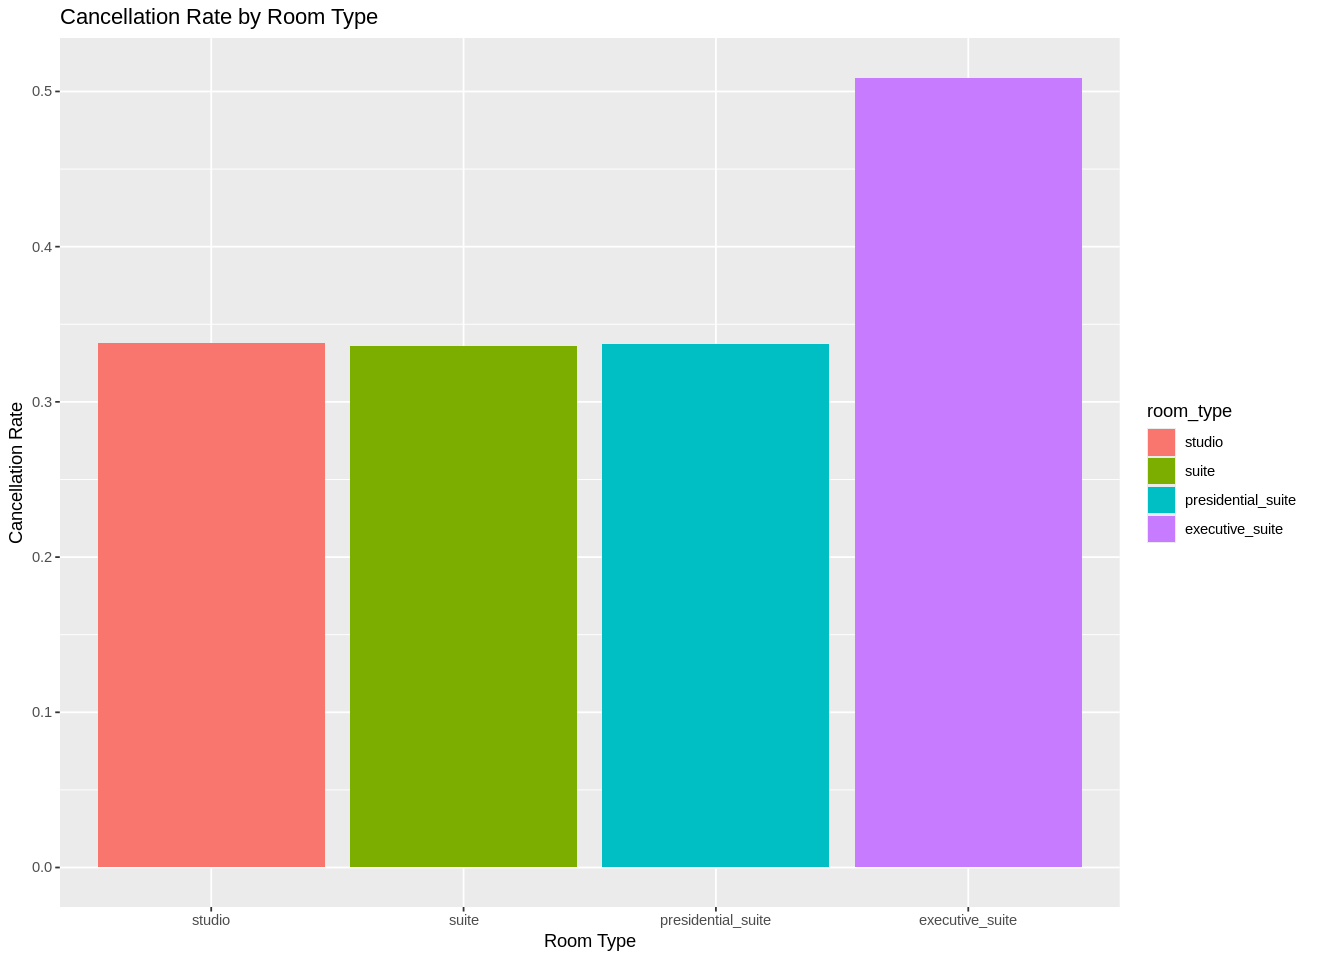

In [10]:
cancellation_by_room_type <- bookings_df %>%
  group_by(room_type, booking_status) %>%
  summarise(count = n()) %>%
  mutate(cancellation_rate = count / sum(count)) %>%
  filter(booking_status == "canceled")
cancellation_by_room_type
plot1<-  cancellation_by_room_type%>%
ggplot(aes(x = room_type, y = cancellation_rate, fill = room_type)) +
  geom_bar(stat = "identity") +
  labs(title = "Cancellation Rate by Room Type",
       x = "Room Type",
       y = "Cancellation Rate")
plot1



## Question 2


**Question**:
How does the price of the room impact the cancellation rate?


**Answer**:
The price of a room and the cancellation rate do not have a significant linear relationship. Rather than creating a distinct linear pattern, the dots are dispersed.
There are few exceptions where certain room costs have high cancellation rates; they are shown by points above 0.5, even if the majority of room prices have lower cancellation rates.There isn't a clear-cut relationship between room price and cancellation rate; instead, the data demonstrates variation in cancellation rates for various hotel prices. Although there may be a general tendency toward lower cancellation rates with lower hotel pricing, there may also be other factors or variables impacting cancellation rates, as indicated by the scatter plot below. There may be underlying patterns or dependencies in the relationship between room price and cancellation rate that need to be further examined.



## Supporting Analysis


`summarise()` has grouped output by 'room_price'. You can override using the
`.groups` argument.


room_price,booking_status,count,cancellation_rate
<dbl>,<fct>,<int>,<dbl>
75.00,canceled,55,0.28205128
75.90,canceled,2,1.00000000
76.33,canceled,1,1.00000000
76.46,canceled,1,1.00000000
76.50,canceled,27,0.45000000
76.58,canceled,1,0.20000000
76.92,canceled,1,1.00000000
77.00,canceled,1,0.05263158
77.03,canceled,2,0.40000000


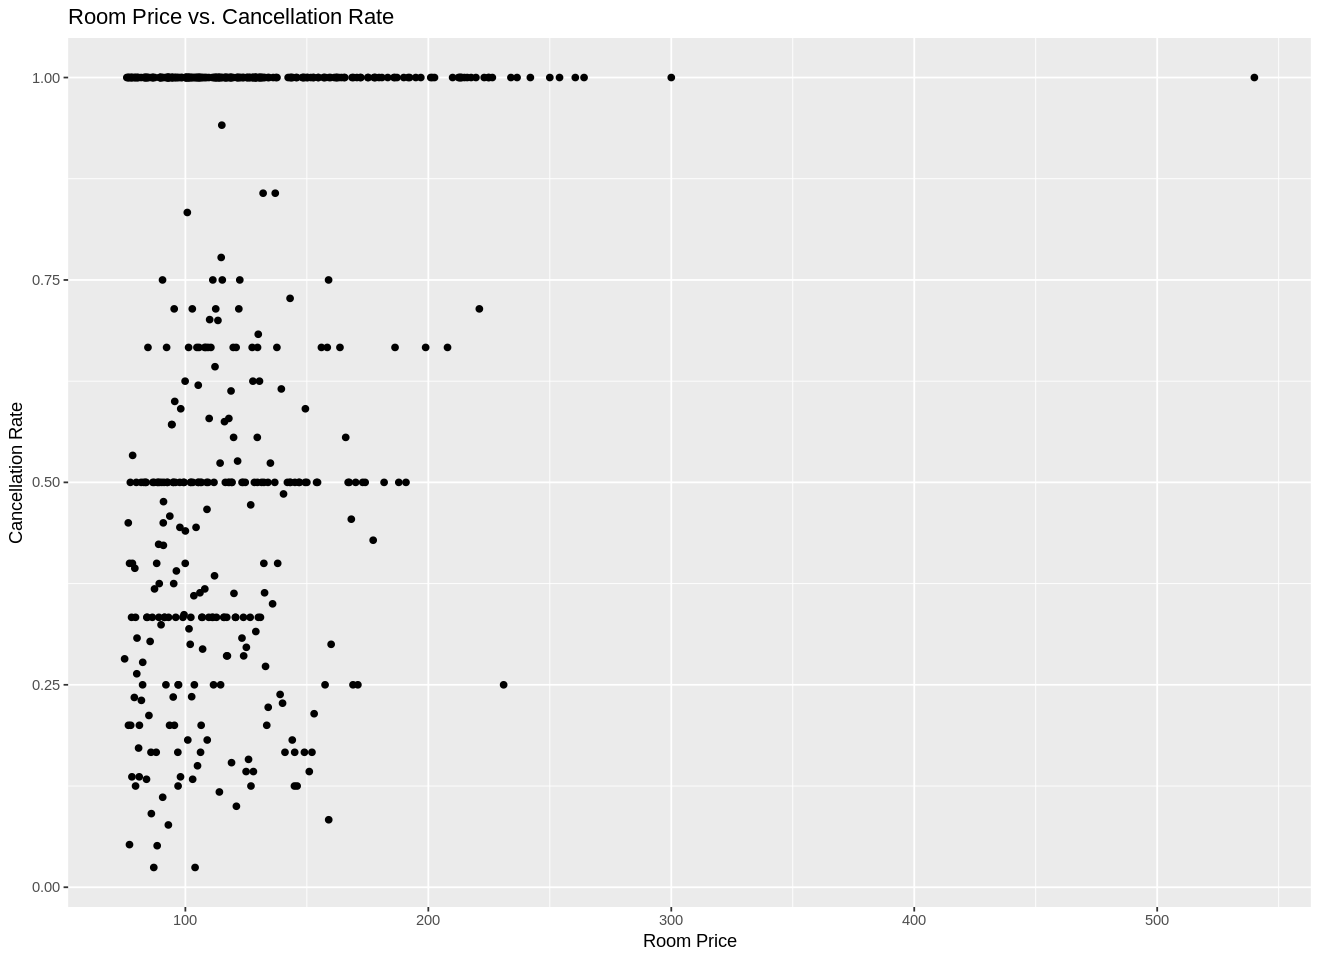

In [11]:
room_price_df <- bookings_df %>%
  group_by(room_price, booking_status) %>%
  summarise(count = n()) %>%
  mutate(cancellation_rate = count / sum(count)) %>%
  filter(booking_status == "canceled")
room_price_df
plot2<- room_price_df%>%
ggplot(aes(x = room_price, y = cancellation_rate)) +
  geom_point() +
  labs(title = "Room Price vs. Cancellation Rate",
       x = "Room Price",
       y = "Cancellation Rate")
plot2

## Question 3


**Question**:

How does the number of special requests impact the cancellation rate?

**Answer**:
The quantity of specific requests and the cancellation rate appear to be related, according to the box plot. More special request-filled reservations have a higher chance of being canceled. It's crucial to remember that, despite the overall trend, data unpredictability persists and that not all reservations with a lot of specific requests are canceled. By meeting customer demands related to special requests, the hotel might potentially reduce cancellations by using this information to better understand the influence of special requests on cancellation rates and make informed decisions.


## Supporting Analysis


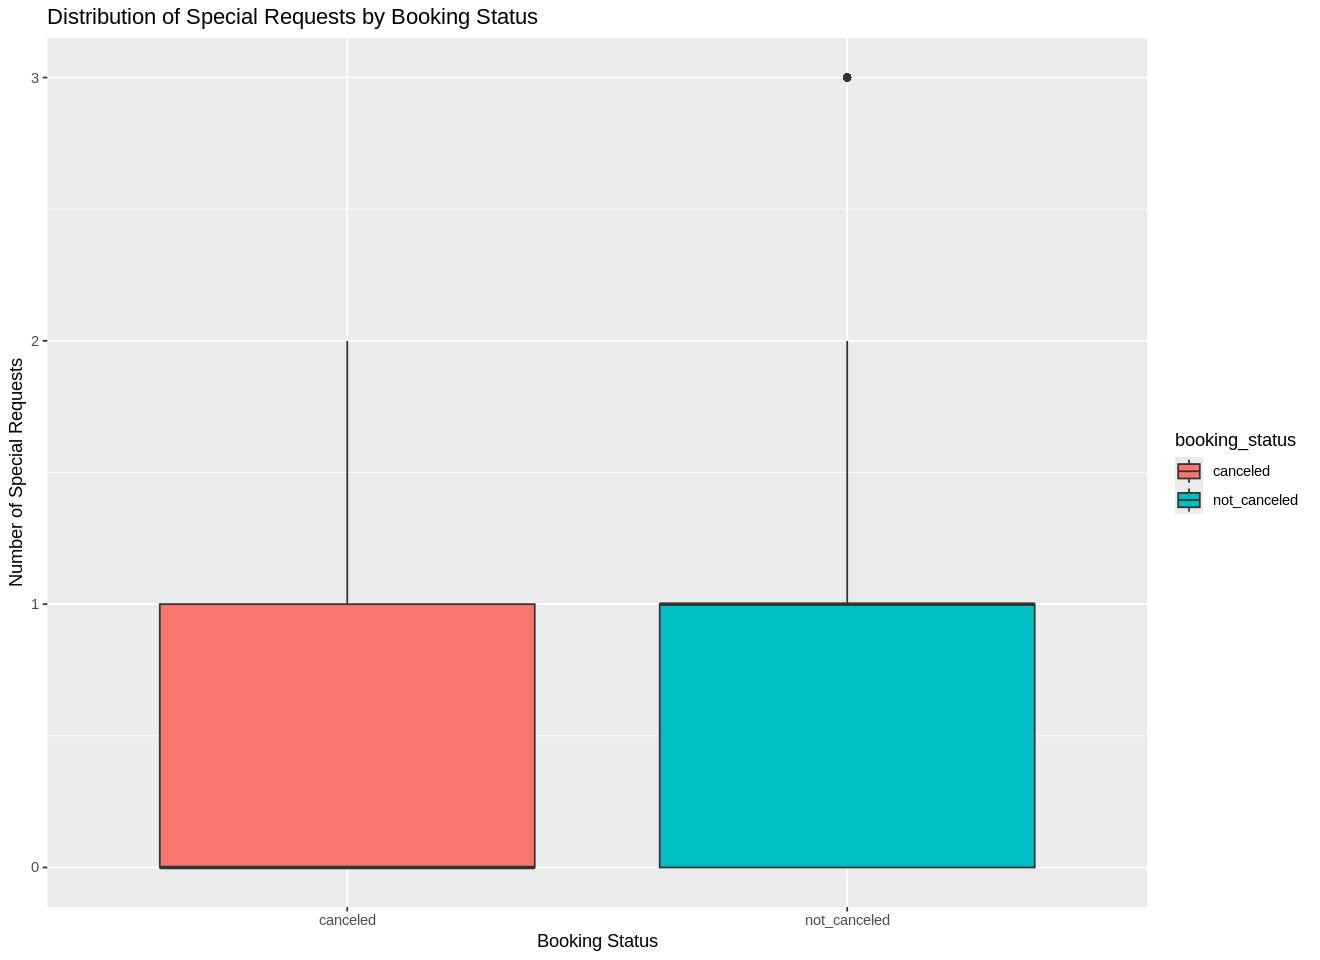

In [12]:

special_boxplot <- bookings_df %>%
  ggplot(aes(x = booking_status, y = special_requests, fill = booking_status)) +
  geom_boxplot() +
  labs(title = "Distribution of Special Requests by Booking Status",
       x = "Booking Status",
       y = "Number of Special Requests")

special_boxplot


## Question 4


**Question**:
Is there a seasonal pattern in cancellation rates based on arrival occupancy season?


**Answer**:
These cancellation rates are graphically represented for the various arrival occupancy seasons in the bar chart. The "peak" season has the greatest cancellation rates, while the "low" season has the lowest; this clearly illustrates the differences in cancellation rates between the three seasons. The "peak" and "moderate" seasons have higher cancellation rates than the "low" season, exhibiting a definite seasonal trend. The hotel can use this information to better understand the seasonal fluctuations in cancellations of reservations and to develop strategies or modifications to better manage their bookings during various occupancy seasons.


## Supporting Analysis


`summarise()` has grouped output by 'arrival_occupancy_season'. You can
override using the `.groups` argument.


arrival_occupancy_season,booking_status,count,cancellation_rate
<fct>,<fct>,<int>,<dbl>
low,canceled,230,0.2005231
moderate,canceled,1026,0.3447581
peak,canceled,699,0.4363296


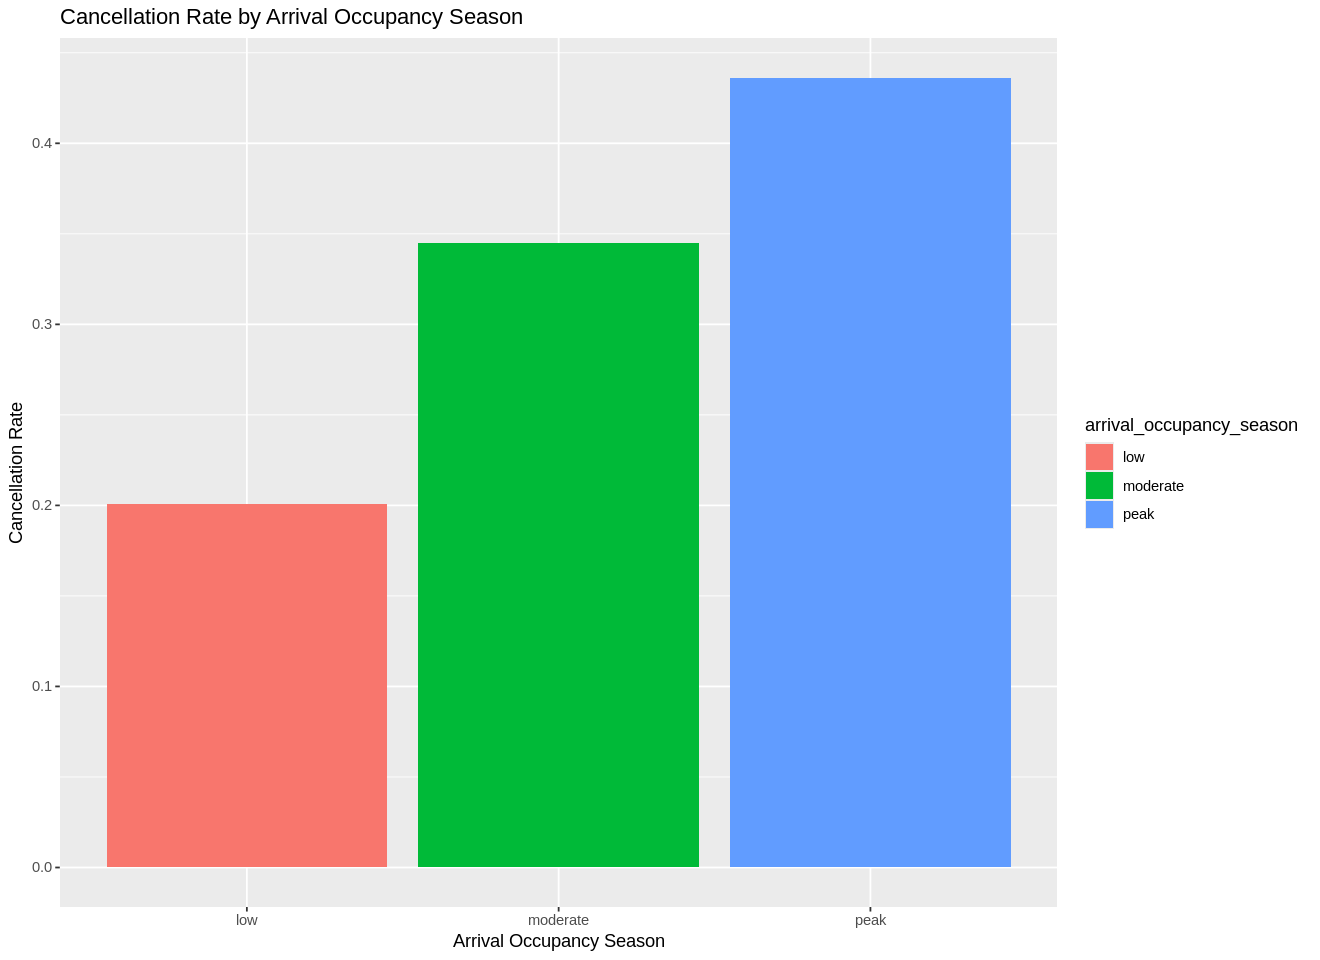

In [13]:
cancel_by_season_df <- bookings_df %>%
  group_by(arrival_occupancy_season, booking_status) %>%
  summarise(count = n()) %>%
  mutate(cancellation_rate = count / sum(count)) %>%
  filter(booking_status == "canceled")
cancel_by_season_df
plot4<- cancel_by_season_df%>%
ggplot(aes(x = arrival_occupancy_season, y = cancellation_rate, fill = arrival_occupancy_season)) +
  geom_bar(stat = "identity") +
  labs(title = "Cancellation Rate by Arrival Occupancy Season",
       x = "Arrival Occupancy Season",
       y = "Cancellation Rate")
plot4

## Question 5


**Question**:

What is the impact of the meal plan on cancellation rate?

**Answer**:

The choice of meal plan may have an effect on the cancellation rate, as the bar graph illustrates. Compared to customers with the other meal plans, individuals who select the "modified_american" meal plan typically have a higher cancellation rate.




## Supporting Analysis


`summarise()` has grouped output by 'meal_plan'. You can override using the
`.groups` argument.


meal_plan,booking_status,count,cancellation_rate
<fct>,<fct>,<int>,<dbl>
continental,canceled,1397,0.3270131
american,canceled,277,0.3202312
modified_american,canceled,281,0.4778912


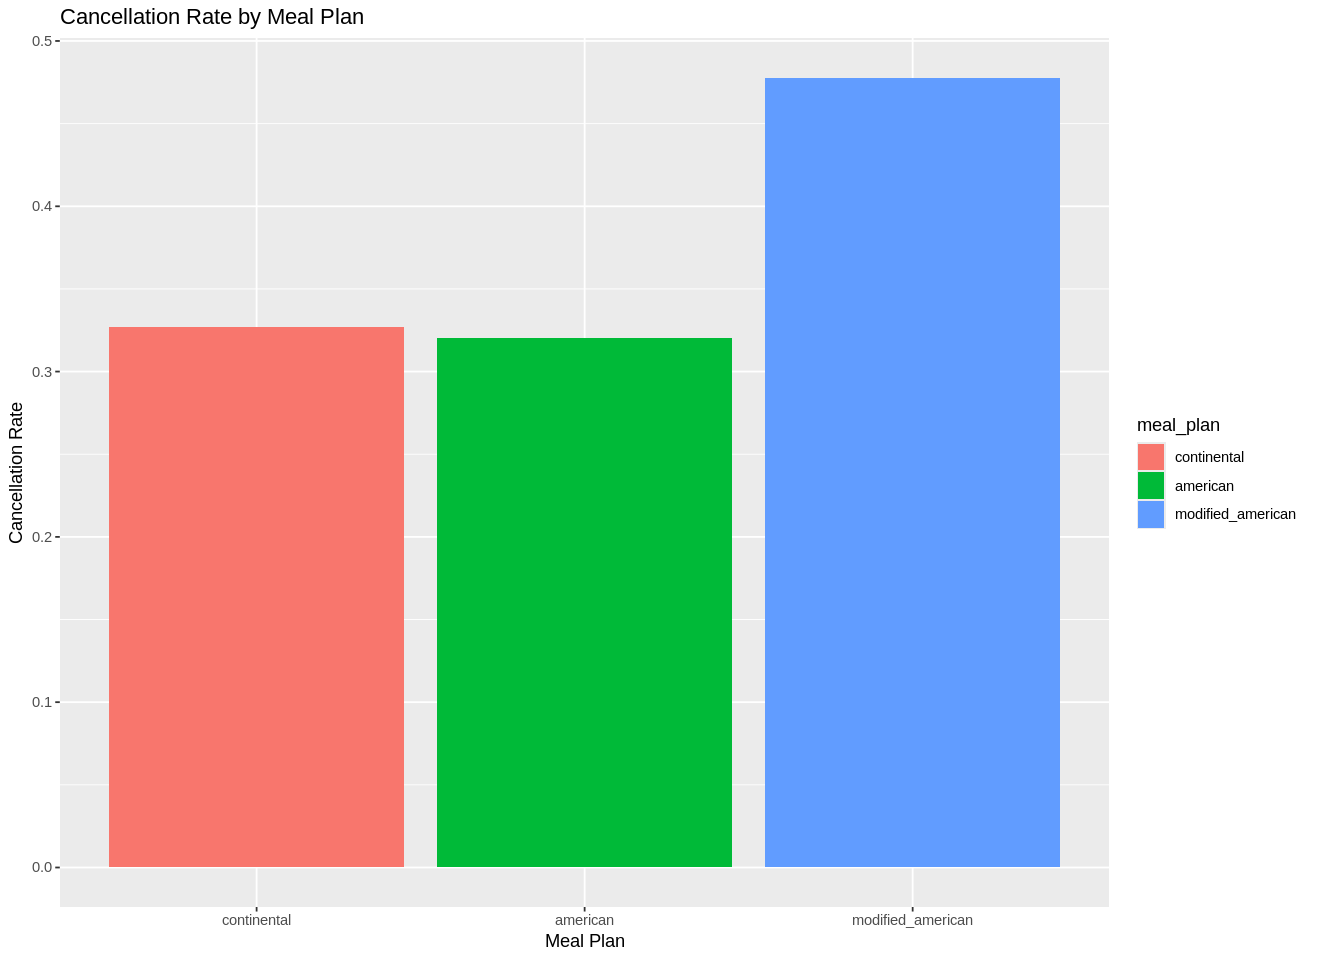

In [14]:
cancellation_by_meal_plan_df <- bookings_df %>%
  group_by(meal_plan, booking_status) %>%
  summarise(count = n()) %>%
  mutate(cancellation_rate = count / sum(count)) %>%
  filter(booking_status == "canceled")
cancellation_by_meal_plan_df
plot5<- cancellation_by_meal_plan_df%>%
ggplot(aes(x = meal_plan, y = cancellation_rate, fill = meal_plan)) +
  geom_bar(stat = "identity") +
  labs(title = "Cancellation Rate by Meal Plan",
       x = "Meal Plan",
       y = "Cancellation Rate")
plot5


# Machine Learning Modeling


In [25]:

install.packages('recipes')
install.packages('vip')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Data Resampling



In [20]:
library(rsample)
set.seed(2911)
data_split <- initial_split(bookings_df, prop = 0.7)
training_data <- training(data_split)
testing_data <- testing(data_split)

## Feature Engineering Pipeline
Specify feature engineering pipeline with the `recipes` package. We will use the pipeline when i create my modeling workflows below for each of my
models.

In [26]:
library(recipes)
booking_recipe <- recipe(booking_status ~ .,
                           data = training_data) %>%
                    step_corr(all_numeric(), -all_outcomes()) %>%
                    step_YeoJohnson(all_numeric(), -all_outcomes()) %>%
					step_dummy(all_nominal(), -all_outcomes())%>%
                    step_normalize(all_numeric(), -all_outcomes()) %>%
                    prep(training = training_data)
summary(booking_recipe)
processed_training_data <- booking_recipe %>%
                               bake(new_data = NULL)

processed_testing_data <- booking_recipe %>%
                           bake(new_data = testing_data)
processed_training_data



Attaching package: ‘recipes’


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:stats’:

    step


ERROR while rich displaying an object: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 2, 3

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mi

previous_cancellations,previous_non_canceled_bookings,adults,children,weekend_nights,week_nights,room_price,special_requests,reserved_parking_space,lead_time_days,⋯,booking_type_mobile_app,booking_type_corporate_partner,booking_type_travel_agency,meal_plan_american,meal_plan_modified_american,room_type_suite,room_type_presidential_suite,room_type_executive_suite,arrival_occupancy_season_moderate,arrival_occupancy_season_peak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.08970123,-0.1196587,0.530424,-0.2791849,1.2900367,-0.77479127,-0.32978379,0.4889179,1.868497,-0.14182457,⋯,1.628505,-0.2297785,-0.2091661,-0.4183654,-0.3338921,0.4663783,-0.1243175,-0.1726411,0.9623986,-0.629726
-0.08970123,-0.1196587,0.530424,-0.2791849,1.2900367,0.07247146,0.91370926,1.7871911,-0.535056,-0.04739643,⋯,-0.613907,-0.2297785,-0.2091661,-0.4183654,-0.3338921,0.4663783,-0.1243175,-0.1726411,0.9623986,-0.629726
-0.08970123,-0.1196587,0.530424,-0.2791849,-0.9906650,0.07247146,0.56165572,-0.8093552,-0.535056,1.65824301,⋯,1.628505,-0.2297785,-0.2091661,-0.4183654,2.9942317,0.4663783,-0.1243175,-0.1726411,-1.0388112,1.587596
-0.08970123,-0.1196587,0.530424,-0.2791849,0.6077796,0.73367341,-0.22114884,-0.8093552,-0.535056,-0.74548323,⋯,-0.613907,-0.2297785,-0.2091661,2.3896584,-0.3338921,0.4663783,-0.1243175,-0.1726411,0.9623986,-0.629726
-0.08970123,-0.1196587,0.530424,-0.2791849,1.2900367,-0.77479127,0.88761496,0.4889179,1.868497,-0.34227427,⋯,-0.613907,-0.2297785,-0.2091661,2.3896584,-0.3338921,0.4663783,-0.1243175,-0.1726411,-1.0388112,1.587596
-0.08970123,-0.1196587,-1.884814,-0.2791849,-0.9906650,-0.77479127,-1.26907008,-0.8093552,1.868497,-0.65389839,⋯,-0.613907,-0.2297785,-0.2091661,-0.4183654,-0.3338921,0.4663783,-0.1243175,-0.1726411,-1.0388112,-0.629726
-0.08970123,-0.1196587,-1.884814,-0.2791849,-0.9906650,-0.77479127,-0.62621812,-0.8093552,-0.535056,0.40276589,⋯,-0.613907,4.3509307,-0.2091661,-0.4183654,-0.3338921,0.4663783,-0.1243175,-0.1726411,0.9623986,-0.629726
-0.08970123,-0.1196587,-1.884814,-0.2791849,-0.9906650,-0.77479127,-1.26907008,1.7871911,-0.535056,-0.09352517,⋯,-0.613907,-0.2297785,-0.2091661,-0.4183654,-0.3338921,0.4663783,-0.1243175,-0.1726411,-1.0388112,-0.629726
-0.08970123,-0.1196587,0.530424,-0.2791849,-0.9906650,0.07247146,-0.06767064,-0.8093552,1.868497,0.21782863,⋯,1.628505,-0.2297785,-0.2091661,-0.4183654,-0.3338921,0.4663783,-0.1243175,-0.1726411,-1.0388112,1.587596


## Model 1( Logistic Regression) Training

In [33]:
library(recipes)
logistic_model <-
  logistic_reg() %>%
  set_engine('glm') %>%
  set_mode('classification')
booking_wf <-
  workflow() %>%
  add_model(logistic_model) %>%
  add_recipe(booking_recipe)
booking_logistic_fit <-
  booking_wf %>%
  fit(data =training_data)
booking_trained_model <-
  booking_logistic_fit %>%
  extract_fit_parsnip()
library(vip)
vip(booking_trained_model)

ERROR: [1m[33mError[39m in `add_recipe()`:[22m
[33m![39m Can't add a trained recipe to a workflow.


## Model 1 Performance Evaluation

              Truth
Prediction     canceled not_canceled
  canceled          382          150
  not_canceled      195          991

.threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
-Inf,0.0000000000,1
0.0001108340,0.0000000000,1
0.0001860809,0.0008764242,1
0.0004965044,0.0017528484,1
0.0007929152,0.0026292726,1
0.0009284482,0.0035056968,1
0.0010296540,0.0043821209,1
0.0012672483,0.0052585451,1
0.0013633530,0.0061349693,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.8622844


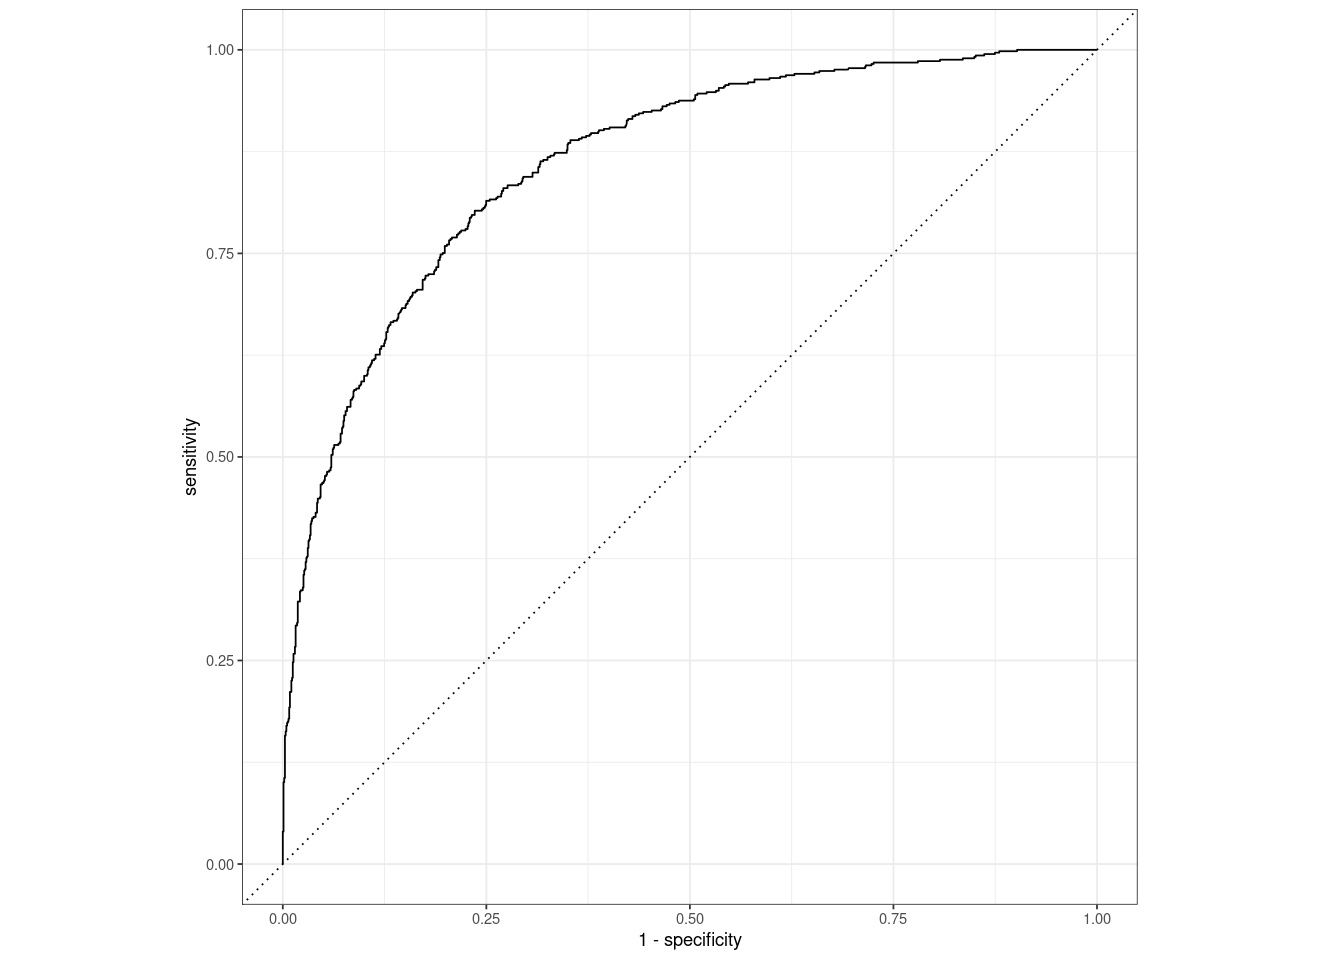

In [ ]:
predictions_categories <-
  predict(booking_logistic_fit, new_data = testing_data)
predictions_probabilities <-
  predict(booking_logistic_fit, new_data = testing_data, type = 'prob')
test_results <-
  testing_data %>%
  select(booking_status) %>%
  bind_cols(predictions_categories) %>%
  bind_cols(predictions_probabilities)
conf_mat(test_results,
         truth = booking_status,
         estimate = .pred_class)
roc_curve(test_results,
          truth = booking_status,
          .pred_canceled)
roc_curve(test_results,
          truth = booking_status,
          .pred_canceled) %>%
  autoplot()
roc_auc(test_results,
          truth = booking_status,
          .pred_canceled)

## Model 2 (KNN) Training

In [ ]:

library(tidymodels)

knn_model <-
  nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
  set_engine("kknn") %>%
  set_mode("classification")

knn_wf <-
  workflow() %>%
  add_model(knn_model) %>%
  add_recipe(booking_recipe)

knn_fit <-
  knn_wf %>%
  fit(data = training_data)

knn_trained_model <-
  knn_fit %>%
  extract_fit_parsnip()

## Model 2 Performance Evaluation

              Truth
Prediction     canceled not_canceled
  canceled          384          169
  not_canceled      193          972

.threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
-Inf,0.0000000,1.0000000
0.0,0.0000000,1.0000000
0.2,0.4566170,0.9220104
0.4,0.6985101,0.8093588
0.6,0.8518843,0.6655113
0.8,0.9272568,0.5043328
1.0,0.9754601,0.3136915
Inf,1.0000000,0.0000000


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.8289697


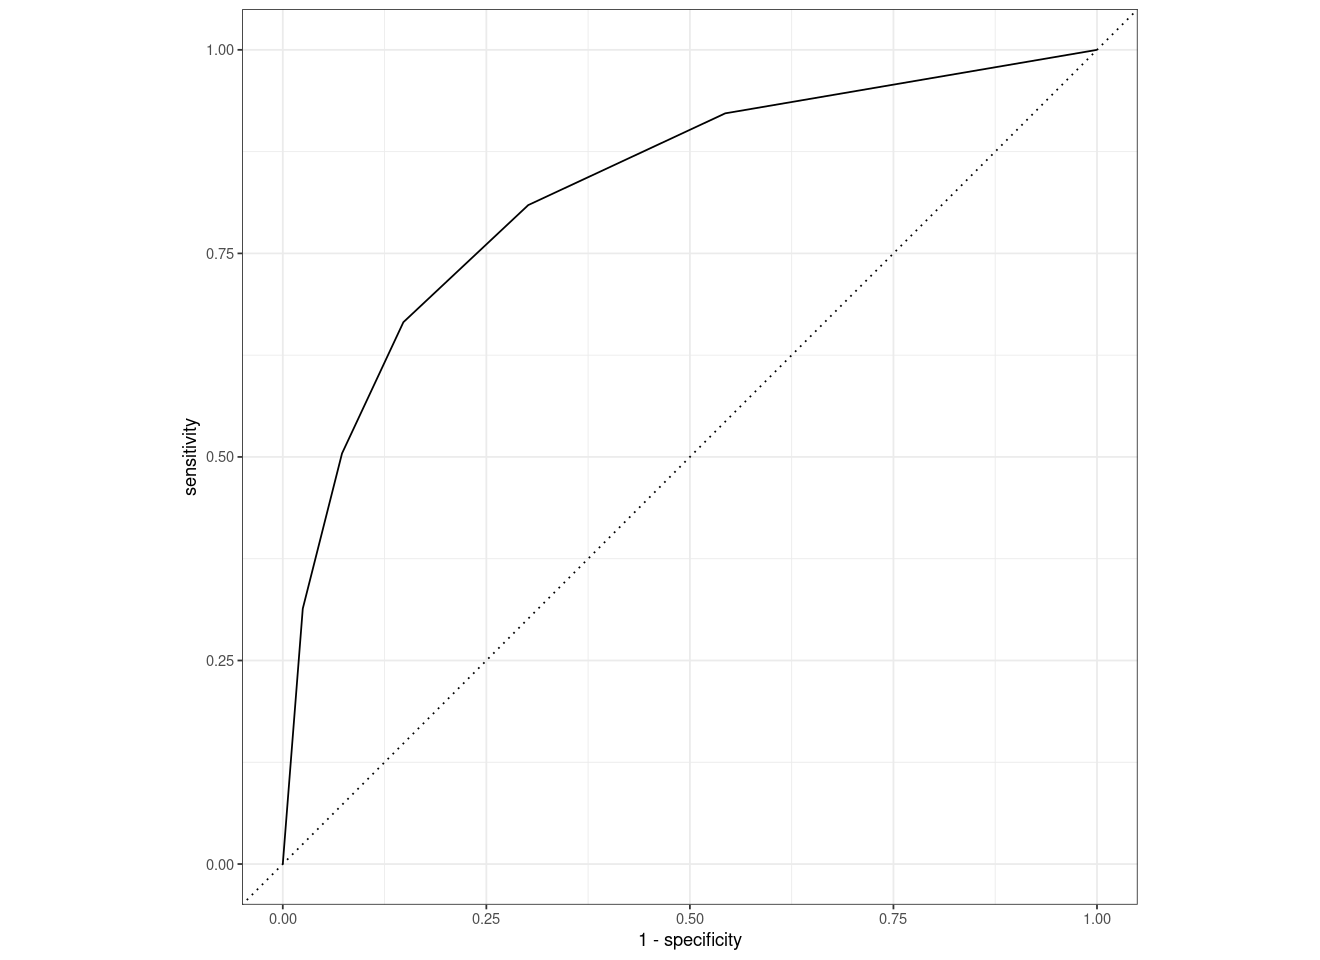

In [ ]:
predictions_categories_knn <-
  predict(knn_fit, new_data = testing_data)
predictions_probabilities_knn <-
  predict(knn_fit, new_data = testing_data, type = 'prob')

test_results_knn <-
  testing_data %>%
  select(booking_status) %>%
  bind_cols(predictions_categories_knn)%>%
bind_cols(predictions_probabilities_knn)

conf_mat(test_results_knn,
         truth = booking_status,
         estimate = .pred_class)
roc_curve(test_results_knn,
          truth = booking_status,
          .pred_canceled)
roc_curve(test_results_knn,
          truth = booking_status,
          .pred_canceled) %>%
  autoplot()
roc_auc(test_results_knn,
          truth = booking_status,
          .pred_canceled)

## Model 3 (Random Forest) Training

In [ ]:

library(tidymodels)
rf_model <-
  rand_forest(mode = "classification", mtry = 4, trees = 100) %>%
  set_engine("ranger")
rf_wf <-
  workflow() %>%
  add_model(rf_model) %>%
  add_recipe(booking_recipe)
rf_fit <-
  rf_wf %>%
  fit(data = training_data)
rf_trained_model <-
  rf_fit %>%
  extract_fit_parsnip()

## Model 3 Performance Evaluation

              Truth
Prediction     canceled not_canceled
  canceled          417           90
  not_canceled      160         1051

.threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
-Inf,0.0000000000,1
0.0003571429,0.0000000000,1
0.0012500000,0.0008764242,1
0.0025655577,0.0017528484,1
0.0030231588,0.0026292726,1
0.0044343434,0.0035056968,1
0.0050167310,0.0043821209,1
0.0051191031,0.0052585451,1
0.0057202004,0.0061349693,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.9114204


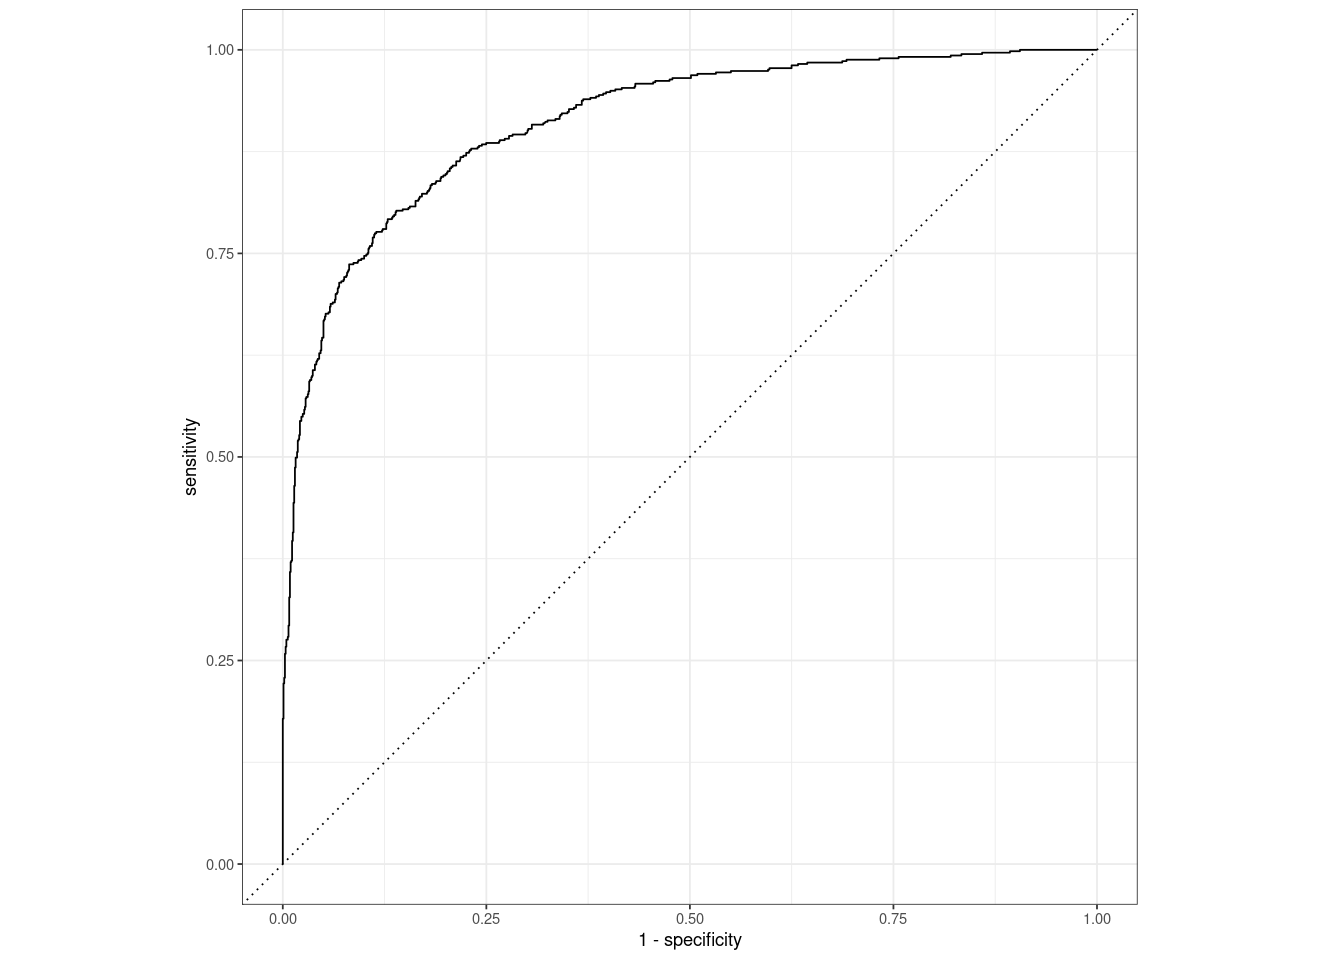

In [ ]:
predictions_categories_rff <-
  predict(rf_fit, new_data = testing_data)
predictions_probabilities_rff <-
  predict(rf_fit, new_data = testing_data, type = 'prob')

# Assess model performance with a confusion matrix
test_results_rff<-
  testing_data %>%
  select(booking_status) %>%
  bind_cols(predictions_categories_rff)%>%
bind_cols(predictions_probabilities_rff)

conf_mat(test_results_rff,
         truth = booking_status,
         estimate = .pred_class)
roc_curve(test_results_rff,
          truth = booking_status,
          .pred_canceled)
roc_curve(test_results_rff,
          truth = booking_status,
          .pred_canceled) %>%
  autoplot()
roc_auc(test_results_rff,
          truth = booking_status,
          .pred_canceled)

# Summary



## Key Findings

**Room Type and Refund Policies:**

1. Cancellation policies differ depending on the kind of room.
2. Executive suites had a 50.9% cancellation rate, which is the highest.
3. The least amount of cancellations (33.8%) is found in studios.
4. This implies that there is a higher likelihood of reservation cancellations for clients who reserve Executive Suites. The hotel can use this information to customize its cancellation policies for various types of rooms.

**Rates** for rooms and cancellations:

1. The price of the room and the cancellation rate do not significantly correlate.
2. varying pricing ranges have varying cancellation rates.
3. There are other forces at work, even though there may be a general trend of decreased cancellation rates with decreasing room pricing.
4. To better understand and handle the variation in cancellation rates, the hotel should investigate these issues.

**Particular Inquiries and Refunds:**

1. Higher cancellation rates are typically seen in reservations with more specific requests.
2. Not all reservations with a lot of particular demands are canceled, despite a noticeable tendency.
3. In order to fulfill unique requests from guests and maybe lower the number of cancellations, the hotel should examine consumer feedback regarding these demands.

**Seasonal Variations in Absences:**

1. The season of arrival occupancy affects cancellation rate.
2. Cancellation rates are highest during peak seasons and lowest during low seasons.
3. The requirement for staffing and booking policies tailored to the specific season is indicated by this seasonal tendency.
4. During high seasons, the hotel should modify staffing levels and rules to better handle reservations.

**Meal Scheduling and Postponement:**

1. Cancellation rates are impacted by the meal plan selection.
2. Customers of "Modified American" meal plans typically have higher cancellation rates.
3. To encourage reservations with particular meal plans that have lower cancellation rates, the hotel can customize its offerings or incentives.


## Modeling Results

Random Forest classification model, which we developed and evaluated, produced an amazing ROC AUC of 0.9114. This suggests that our Random Forest model is the most effective classification model for this dataset because it has the highest discriminatory power of all the models we examined.



## Recommendations

**Customized Cancellation Procedures:**

1. Adjust cancellation procedures according to the types of rooms. To lower cancellations, think about providing incentives for reservations for Executive Suites.
2. Examine the cancellation policies for every type of accommodation and, if needed, provide more accommodating conditions.

**Strategies for Pricing:**

1. Use dynamic pricing techniques based on past cancellation rates at various price points.
2. During busy times, provide specials or discounts to entice reservations with reduced cancellation rates.

**Manage Special Requests:**

1. Gather input from clients regarding specific requirements, then improve services in response.
2. Utilize client input to offer customized services and maybe lower cancelation rates.

**Seasonal Administration:**

1. Create plans for handling reservations during busy times of the year.
2. During certain times, adjust staffing levels to meet the additional demand.

**Meal Plan Rewards:**

1. By providing incentives, you can get reservations for meal plans that have reduced cancellation rates.
2. Examine consumer preferences for particular meal plans and adjust marketing strategies accordingly.


In conclusion, this Analysis offers insightful information on the variables affecting reservation cancellations as well as tactics to increase client retention. The hotel may improve customer satisfaction and commercial performance by reducing cancellations and improving its services by putting the suggested actions into practice.
